In [350]:
# Dependencies and Setup
import pandas as pd
import pandas as pd
import requests
from pathlib import Path
import hvplot.pandas
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy import stats
from numpy.random import normal
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
pd.options.mode.copy_on_write = True

In [354]:
# Save path to the data set as a variable.
data_file = Path("Resources/Natural_Disasters.csv")
Temperature_file = Path("Resources/Temperature.csv")
Temperature_corelate = Path("Resources/Natural_Disasters1.csv")

# Read our data file with the Pandas library
natural_disasters_df = pd.read_csv(data_file)
natural_disasters_df

,ObjectId,Country,ISO2,ISO3,Country_Disasters,Unit,Source,CTS_Code,CTS_Name,F1980,...,F2012,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021
0,1.0,Afghanistan,AF,AFG,Afghanistan - Drought,Number,"The Emergency Events Database (EM-DAT) , Centr...",ECCD,Climate Related Disasters Frequency,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0
1,2.0,Afghanistan,AF,AFG,Afghanistan - Extreme temperature,Number,"The Emergency Events Database (EM-DAT) , Centr...",ECCD,Climate Related Disasters Frequency,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,Afghanistan,AF,AFG,Afghanistan - Flood,Number,"The Emergency Events Database (EM-DAT) , Centr...",ECCD,Climate Related Disasters Frequency,1.0,...,6.0,4.0,2.0,1.0,4.0,1.0,3.0,6.0,5.0,2.0
3,4.0,Afghanistan,AF,AFG,Afghanistan - Landslide,Number,"The Emergency Events Database (EM-DAT) , Centr...",ECCD,Climate Related Disasters Frequency,NaN,...,3.0,1.0,NaN,4.0,NaN,2.0,1.0,1.0,1.0,1.0
4,5.0,Afghanistan,AF,AFG,Afghanistan - Storm,Number,"The Emergency Events Database (EM-DAT) , Centr...",ECCD,Climate Related Disasters Frequency,NaN,...,NaN,NaN,1.0,NaN,NaN,2.0,NaN,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
733,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [281]:
# Remove extraneous column
Natural_disaster_reduced_df = natural_disasters_df.drop(columns=['ISO2', 'ISO3', 'ObjectId', 'F1980', 'F1981', 'F1982', 'F1983', 'F1984', 'F1985', 'F1986', 'F1987', 'F1988', 'F1989', 'Unit', 'Source', 'CTS_Code', 'CTS_Name',
                                                                 ])
Natural_disaster_reduced_df.head()

,Country,Country_Disasters,F1990,F1991,F1992,F1993,F1994,F1995,F1996,F1997,...,F2012,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021
0,Afghanistan,Afghanistan - Drought,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0
1,Afghanistan,Afghanistan - Extreme temperature,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,Afghanistan - Flood,NaN,3.0,2.0,NaN,NaN,2.0,1.0,2.0,...,6.0,4.0,2.0,1.0,4.0,1.0,3.0,6.0,5.0,2.0
3,Afghanistan,Afghanistan - Landslide,NaN,NaN,NaN,2.0,NaN,1.0,NaN,1.0,...,3.0,1.0,NaN,4.0,NaN,2.0,1.0,1.0,1.0,1.0
4,Afghanistan,Afghanistan - Storm,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,2.0,NaN,NaN,1.0,NaN


In [282]:
# Remove remaining rows with missing data
natural_disasters_cleaned_df = Natural_disaster_reduced_df.fillna(0)

natural_disasters_cleaned_df.head(10)

,Country,Country_Disasters,F1990,F1991,F1992,F1993,F1994,F1995,F1996,F1997,...,F2012,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021
0,Afghanistan,Afghanistan - Drought,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,Afghanistan,Afghanistan - Extreme temperature,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Afghanistan,Afghanistan - Flood,0.0,3.0,2.0,0.0,0.0,2.0,1.0,2.0,...,6.0,4.0,2.0,1.0,4.0,1.0,3.0,6.0,5.0,2.0
3,Afghanistan,Afghanistan - Landslide,0.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0,...,3.0,1.0,0.0,4.0,0.0,2.0,1.0,1.0,1.0,1.0
4,Afghanistan,Afghanistan - Storm,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0
5,Afghanistan,Afghanistan - Wildfire,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Albania,Albania - Drought,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Albania,Albania - Extreme temperature,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,Albania,Albania - Flood,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,...,0.0,0.0,0.0,3.0,1.0,1.0,1.0,0.0,0.0,1.0
9,Albania,Albania - Landslide,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [283]:

# rename columns:
natural_disasters_renamed_df = natural_disasters_cleaned_df.rename(columns={"ISO3":"Country_Code","Indicator":"Disasters",
                                                "F1980":"1980", "F1981":"1981", "F1982":"1982",
                                                "F1983":"1983","F1984":"1984","F1985":"1985",
                                                "F1986":"1986","F1987":"1987","F1988":"1988",
                                                "F1989":"1989","F1990":"1990","F1991":"1991","F1992":"1992",
                                                "F1993":"1993","F1994":"1994","F1995":"1995",
                                                "F1996":"1996","F1997":"1997","F1998":"1998",
                                                "F1999":"1999","F2000":"2000","F2001":"2001",
                                                "F2002":"2002","F2003":"2003","F2004":"2004",
                                                "F2005":"2005","F2006":"2006","F2007":"2007",
                                                "F2008":"2008","F2009":"2009","F2010":"2010",
                                                "F2011":"2011","F2012":"2012","F2013":"2013",
                                                "F2014":"2014","F2015":"2015","F2016":"2016",
                                                "F2017":"2017","F2018":"2018","F2019":"2019",
                                                 "F2020":"2020","F2021":"2021","F2022":"2022" })
natural_disasters_renamed_df.head(20)



,Country,Country_Disasters,1990,1991,1992,1993,1994,1995,1996,1997,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Afghanistan,Afghanistan - Drought,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,Afghanistan,Afghanistan - Extreme temperature,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Afghanistan,Afghanistan - Flood,0.0,3.0,2.0,0.0,0.0,2.0,1.0,2.0,...,6.0,4.0,2.0,1.0,4.0,1.0,3.0,6.0,5.0,2.0
3,Afghanistan,Afghanistan - Landslide,0.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0,...,3.0,1.0,0.0,4.0,0.0,2.0,1.0,1.0,1.0,1.0
4,Afghanistan,Afghanistan - Storm,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0
5,Afghanistan,Afghanistan - Wildfire,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Albania,Albania - Drought,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Albania,Albania - Extreme temperature,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,Albania,Albania - Flood,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,...,0.0,0.0,0.0,3.0,1.0,1.0,1.0,0.0,0.0,1.0
9,Albania,Albania - Landslide,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [228]:
# Set the 'Country Code' to be our index for easy referencing of rows
#natural_disasters_renamed_df = natural_disasters_renamed_df.set_index("Country")

In [229]:
# Collect the mean Natural disaster for the world
average_disasters = natural_disasters_renamed_df[[str(year) for year in range(1990, 2021)]].mean()

# Collect the years where data was collected
years = average_disasters.keys()

In [ ]:
# Plot the world average as a line chart
plt.figure(figsize=(20, 5))
world_avg, = plt.plot(years, average_disasters, color="blue", label="World Average" )

# Plot the unemployment values for a single country
country_one, = plt.plot(years, natural_disasters_renamed_df.loc['United States - Extreme temperature',["1990","1991","1992","1993","1994","1995","1996",
                                                                                                       "1997","1998","1999","2000","2001","2002","2003",
                                                                                                       "2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015",
                                                                  "2016","2017","2018","2019","2020"]]) 
                        #Color="green",label=natural_disasters_renamed_df.loc['United States',"Country"])

# Create a legend for our chart
plt.legend(handles=[world_avg, country_one], loc="best")

# Show the chart
plt.show()

In [245]:
#average_unemployment.plot(label="World Average")
#combined_unemployed_data.loc['USA', "2010":"2020"].plot(label="United States")
#plt.legend()
#plt.show()

In [284]:
# Define the list of countries to search for
countries_to_search = ["China", "United States", "India", "Australia", "Brazil", "Russian Federation", 
                   "Japan", "Canada",
                    "Germany", "Italy", "France",
                    "United Kingdom"]

# Initialize an empty list to store the rows to keep
rows_to_keep = []

# Iterate over the DataFrame rows
for index, row in natural_disasters_renamed_df.iterrows():
    for word in countries_to_search:
        if word == row['Country']:
            rows_to_keep.append(index)
            break  # Break out of the inner loop once a word is found

# Keep only the rows that contain the words in the list
filtered_country_df = natural_disasters_renamed_df.loc[rows_to_keep]
filtered_country_df

,Country,Country_Disasters,1990,1991,1992,1993,1994,1995,1996,1997,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
37,Australia,Australia - Drought,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,4.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,6.0,6.0
38,Australia,Australia - Extreme temperature,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
39,Australia,Australia - Flood,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,...,7.0,7.0,7.0,7.0,6.0,5.0,8.0,8.0,8.0,7.0
40,Australia,Australia - Landslide,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0
41,Australia,Australia - Storm,2.0,2.0,2.0,2.0,4.0,4.0,6.0,5.0,...,7.0,6.0,6.0,6.0,5.0,8.0,8.0,8.0,8.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,United States,United States - Extreme temperature,2.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,...,1.0,1.0,4.0,3.0,3.0,4.0,4.0,3.0,3.0,4.0
711,United States,United States - Flood,4.0,14.0,0.0,6.0,1.0,5.0,4.0,8.0,...,1.0,1.0,0.0,1.0,1.0,5.0,5.0,3.0,4.0,3.0
712,United States,United States - Landslide,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,6.0
713,United States,United States - Storm,15.0,17.0,27.0,20.0,9.0,10.0,9.0,23.0,...,19.0,15.0,13.0,19.0,16.0,17.0,11.0,14.0,19.0,23.0


In [285]:
#

filtered_country_new_df = filtered_country_df.drop(columns=['Country'])
filtered_country_new_df


,Country_Disasters,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
37,Australia - Drought,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,4.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,6.0,6.0
38,Australia - Extreme temperature,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
39,Australia - Flood,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,6.0,...,7.0,7.0,7.0,7.0,6.0,5.0,8.0,8.0,8.0,7.0
40,Australia - Landslide,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0
41,Australia - Storm,2.0,2.0,2.0,2.0,4.0,4.0,6.0,5.0,5.0,...,7.0,6.0,6.0,6.0,5.0,8.0,8.0,8.0,8.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,United States - Extreme temperature,2.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,...,1.0,1.0,4.0,3.0,3.0,4.0,4.0,3.0,3.0,4.0
711,United States - Flood,4.0,14.0,0.0,6.0,1.0,5.0,4.0,8.0,7.0,...,1.0,1.0,0.0,1.0,1.0,5.0,5.0,3.0,4.0,3.0
712,United States - Landslide,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,6.0
713,United States - Storm,15.0,17.0,27.0,20.0,9.0,10.0,9.0,23.0,20.0,...,19.0,15.0,13.0,19.0,16.0,17.0,11.0,14.0,19.0,23.0


In [317]:
#Read the Temperature csv

Temperature_df = pd.read_csv(Temperature_file)
Temperature_df 

Temperature_cleaned_df = Temperature_df.rename(columns={"F1990":"1990","F1991":"1991","F1992":"1992",
                                                "F1993":"1993","F1994":"1994","F1995":"1995",
                                                "F1996":"1996","F1997":"1997","F1998":"1998",
                                                "F1999":"1999","F2000":"2000","F2001":"2001",
                                                "F2002":"2002","F2003":"2003","F2004":"2004",
                                                "F2005":"2005","F2006":"2006","F2007":"2007",
                                                "F2008":"2008","F2009":"2009","F2010":"2010",
                                                "F2011":"2011","F2012":"2012","F2013":"2013",
                                                "F2014":"2014","F2015":"2015","F2016":"2016",
                                                "F2017":"2017","F2018":"2018","F2019":"2019",
                                                "F2020":"2020","F2021":"2021"})

                                                         
Temperature_final_df = Temperature_cleaned_df.drop(columns=["Country"])
Temperature_final_df 

,Country_Disasters,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Australia - Temperature,0.549,0.820,0.281,0.484,0.221,0.413,0.604,0.383,1.092,...,0.308,1.499,1.198,1.087,1.172,1.141,1.129,1.422,1.416,0.629
1,Brazil - Temperature,0.435,0.468,0.403,0.495,0.608,0.799,0.504,0.671,1.234,...,1.023,0.922,1.153,1.516,1.457,1.363,1.148,1.517,1.477,1.154
2,Canada - Temperature,0.078,0.336,0.100,0.342,0.467,0.938,-0.125,0.426,2.470,...,2.144,1.182,0.288,1.231,2.373,1.480,0.477,1.311,1.128,2.515
3,China - Temperature,0.852,0.520,0.130,0.281,0.733,0.577,0.210,0.733,1.264,...,0.626,1.073,1.062,1.297,1.319,1.573,1.361,1.422,1.620,1.701
4,France - Temperature,1.591,0.257,0.659,0.325,1.547,1.326,0.188,1.240,0.947,...,1.220,0.714,2.049,1.612,1.794,1.796,2.060,2.023,2.551,1.337
5,Germany - Temperature,1.571,0.286,1.228,0.310,1.625,1.307,-0.699,0.558,1.153,...,1.349,0.583,2.519,1.674,1.988,1.653,2.393,2.332,2.516,1.325
6,India - Temperature,-0.081,0.190,0.035,0.223,0.107,0.238,0.339,-0.064,0.614,...,0.516,0.451,0.530,0.711,1.088,0.966,0.874,0.802,0.520,0.733
7,Italy - Temperature,1.132,0.029,0.542,0.527,1.513,0.418,0.233,0.931,0.969,...,1.543,1.006,1.638,1.704,1.716,1.606,1.834,1.698,1.902,1.569
8,Japan - Temperature,1.132,0.726,0.333,0.012,0.965,0.348,-0.127,0.454,1.199,...,0.395,0.628,0.560,0.833,1.323,0.796,0.926,1.272,1.437,1.270
9,Russian Federation - Temperature,NaN,NaN,0.359,0.951,0.572,2.101,0.808,1.277,-0.035,...,1.933,1.166,1.753,2.246,2.459,2.127,2.043,2.178,3.691,1.643


In [322]:
Temperature_df = Temperature_final_df .transpose()
Temperature_df
Temperature_df.to_csv("Resources/Temperature_corelate.csv", index_label="Country_Disasters")

In [346]:
#filtered_country_new_df.set_index("Country_Disasters", inplace = True)
country_df = filtered_country_new_df.transpose()
country_df
country_df.to_csv("Resources/Natural_Disasters1.csv", index_label="Country_Disasters")

In [379]:

#merge_df = pd.merge(country_df, Temperature_df, on=['Country_Disasters'], how='inner')

#merge_df.head(20)
# Read our data file with the Pandas library
Temperature_disasters_df = pd.read_csv(Temperature_corelate)
Temperature_disasters_df 

,Country_Disasters,Australia - Temperature,Australia - Drought,Australia - Extreme temperature,Australia - Flood,Australia - Landslide,Australia - Storm,Australia - Wildfire,Brazil - Temperature,Brazil - Drought,...,United Kingdom - Extreme temperature,United Kingdom - Flood,United Kingdom - Storm,United States - Temperature,United States - Drought,United States - Extreme temperature,United States - Flood,United States - Landslide,United States - Storm,United States - Wildfire
0,1990,0.549,1,2,2,1,2,3,0.435,1,...,0,0,7,0.674,0,2,4,0,15,0
1,1991,0.820,1,1,2,1,2,3,0.468,2,...,1,0,1,0.527,2,0,14,0,17,0
2,1992,0.281,1,1,2,1,2,3,0.403,2,...,0,0,0,0.395,0,0,0,0,27,1
3,1993,0.484,1,1,2,1,2,4,0.495,2,...,0,2,0,0.004,0,1,6,0,20,1
4,1994,0.221,1,1,2,1,4,5,0.608,2,...,0,2,0,0.466,0,0,1,1,9,2
5,1995,0.413,1,1,2,1,4,5,0.799,2,...,0,0,1,0.630,0,2,5,1,10,2
6,1996,0.604,1,1,2,1,6,5,0.504,2,...,0,0,1,-0.011,0,0,4,1,9,3
7,1997,0.383,1,2,4,1,5,5,0.671,3,...,1,2,0,0.384,0,0,8,1,23,2
8,1998,1.092,1,2,6,1,5,5,1.234,3,...,0,1,3,1.272,0,1,7,1,20,3
9,1999,0.580,2,2,5,2,4,5,0.523,3,...,0,1,2,0.758,1,1,1,1,16,2


The r value is 0.876947166555092
The line eq is y = 3.711239x +-0.774307


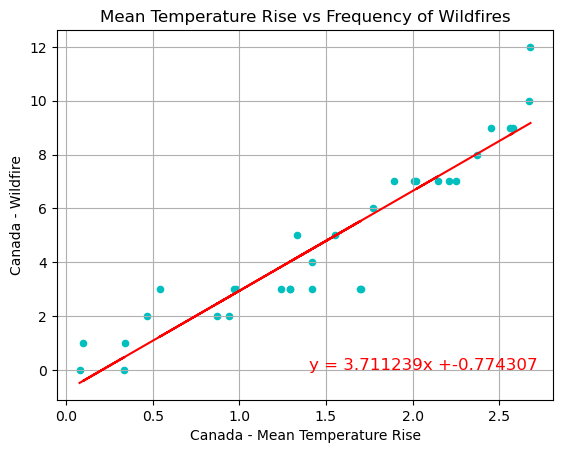

In [423]:
Temperature_disasters_df.plot(x='Canada - Mean Temperature Rise', y='Canada - Wildfire', kind = 'scatter', 
           marker='o',facecolors='b', color ='c',grid=True)

x_values = Temperature_disasters_df['Canada - Mean Temperature Rise']
y_values = Temperature_disasters_df['Canada - Wildfire']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,6)) + "x +" + str(round(intercept,6))

plt.plot(x_values,regress_values,color='r')
plt.savefig("Images/Mean Temperature Rise vs Wild fire.png", format='png', dpi=270)
plt.annotate(line_eq,(1.4,0.00),fontsize=12,color="red")
# Add labels and title to plot

plt.title('Mean Temperature Rise vs Frequency of Wildfires')
print(f"The r value is {rvalue**2}")
print(f"The line eq is {line_eq}")

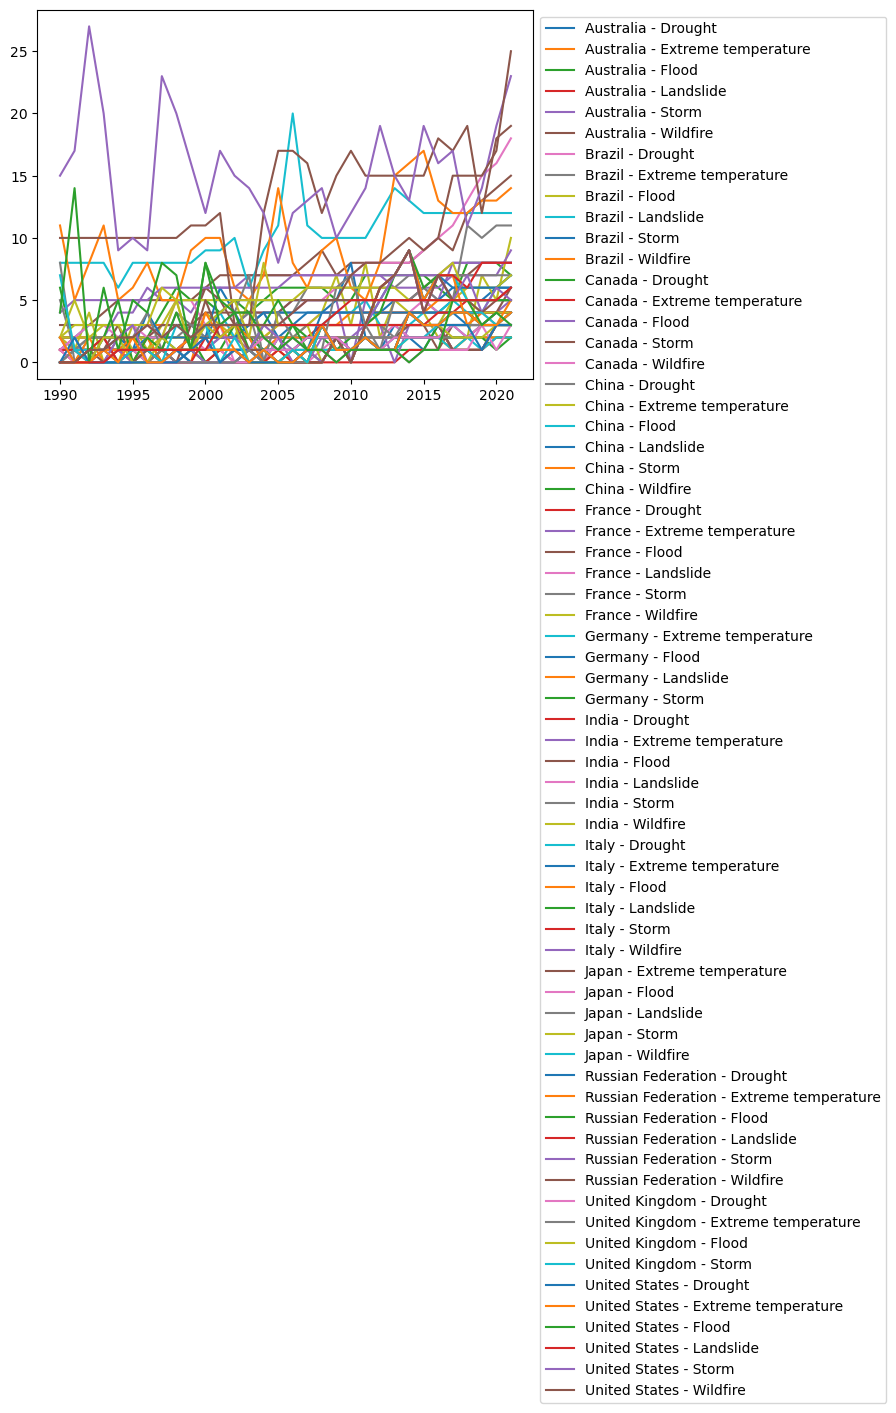

In [409]:

ax = country_df.plot()
ax.legend(loc="upper left", bbox_to_anchor = (1,1))

plt.show()

In [ ]:
# Plot Natural Disasters for different years and countries
plt.figure(figsize=(20, 5))
for country in filtered_country_df['Country'].unique():
    country_info = filtered_country_df[filtered_country_df['Country'] == country]
    plt.plot(country_info['Disasters'], country_info['2021'], label=country)

plt.xlabel('Disasters')
plt.ylabel('Year')
plt.title('Natural Disasters by Country')
plt.legend()
plt.show()